In [115]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
housing = pd.read_csv('housing.csv')

In [117]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [118]:
housing.shape

(20640, 10)

In [119]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [120]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [121]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


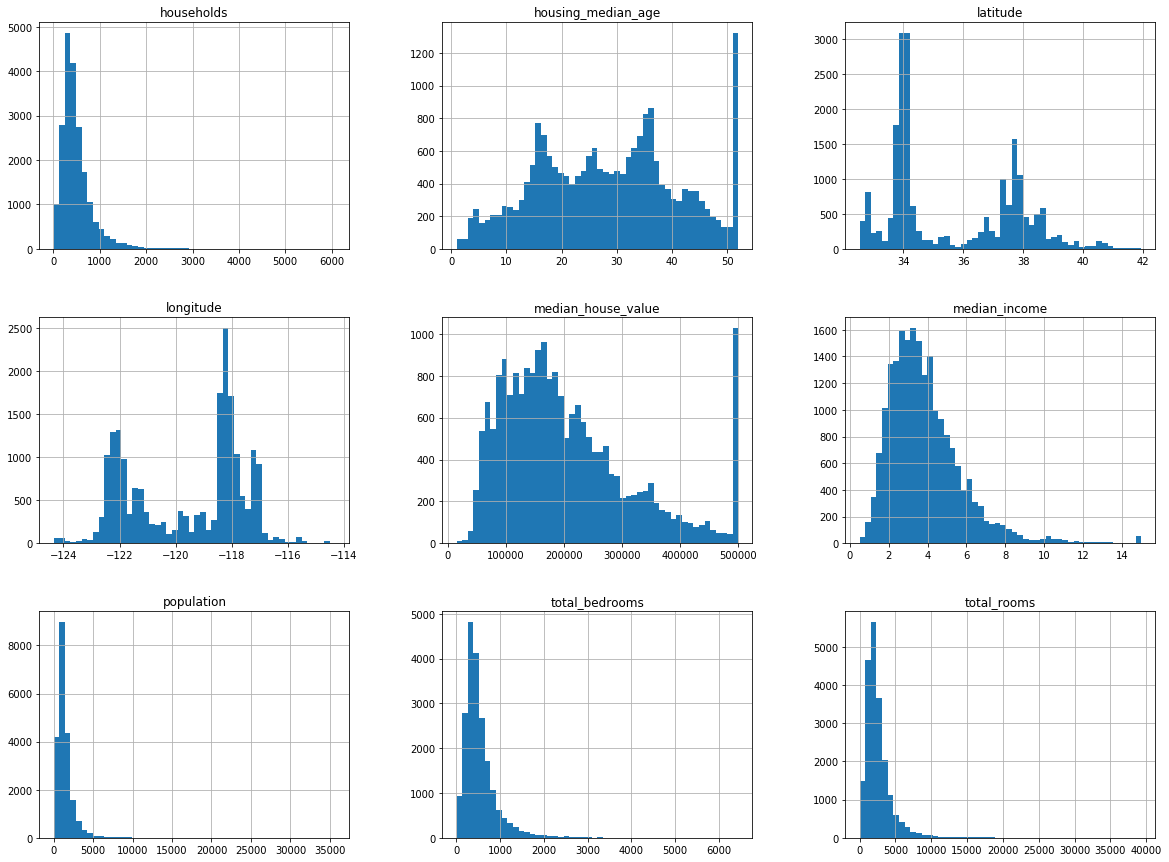

In [122]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

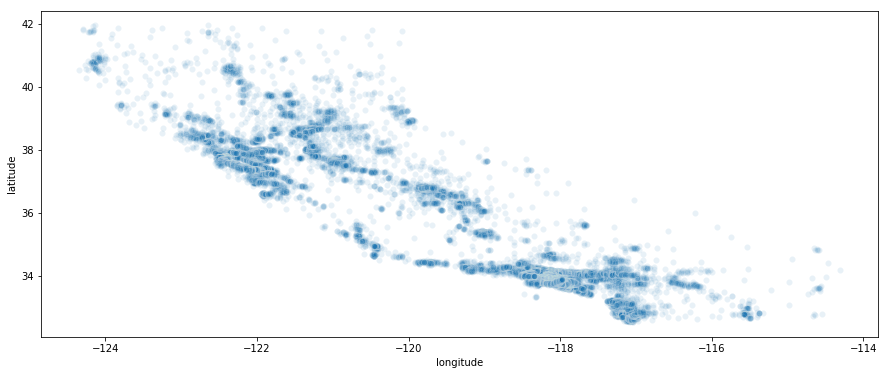

In [123]:
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.scatterplot(x='longitude', y='latitude', data=housing, ax=ax, alpha=0.1)

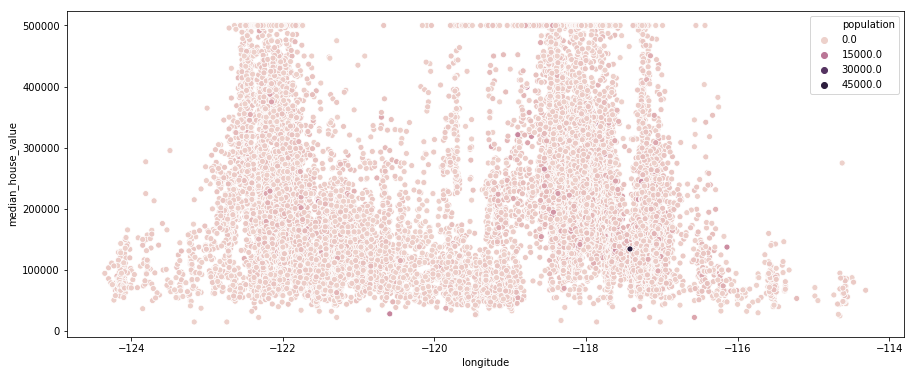

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.scatterplot(x='longitude', y='median_house_value', data=housing, hue='population', ax=ax)

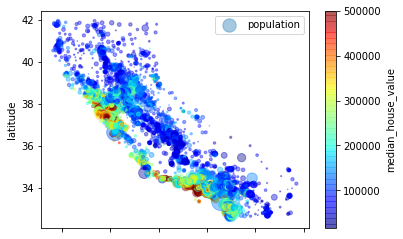

In [125]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [126]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

C:\Users\Peeyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C3411B7B8>,
      dtype=object)

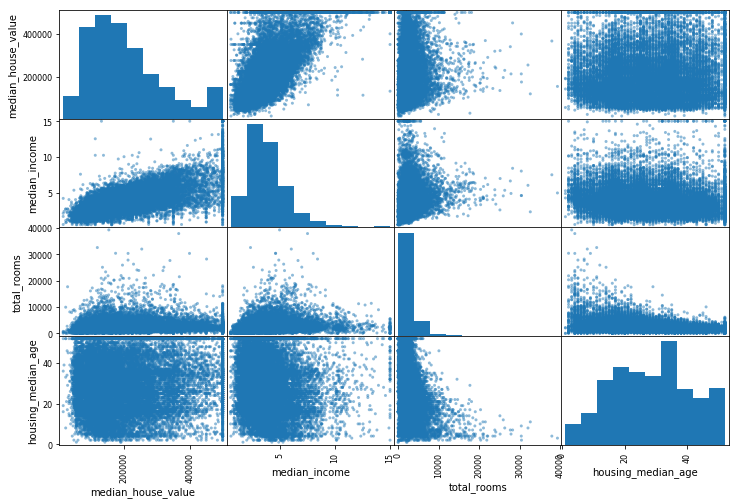

In [127]:
from pandas.tools.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

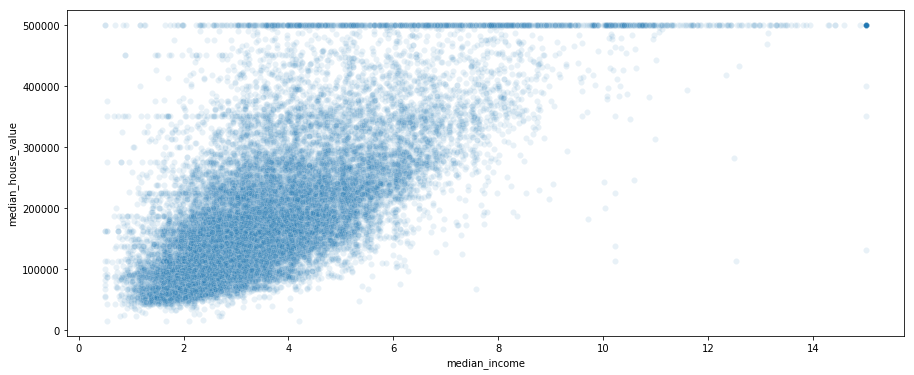

In [128]:
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.scatterplot(x='median_income', y='median_house_value', alpha=0.1, data=housing)

In [129]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [130]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [131]:
## handling missing values in total_bedrooms
tb_median = housing['total_bedrooms'].median()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(tb_median)

In [132]:
bpr_median = housing['bedrooms_per_room'].median()
housing['bedrooms_per_room'] = housing['bedrooms_per_room'].fillna(bpr_median)

In [133]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
rooms_per_household         20640 non-null float64
bedrooms_per_room           20640 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [134]:
housing.to_csv('h_preprocessed.csv')

In [135]:
housing = housing.drop(['total_rooms', 'total_bedrooms'], axis=1)

In [136]:
housing = pd.get_dummies(housing)

In [137]:
housing.shape

(20640, 15)

In [138]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'population',
       'households', 'median_income', 'median_house_value',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [139]:
y = housing['median_house_value']
X = housing.drop(columns=['median_house_value'])

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [142]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [143]:
y_pred = model.predict(X_test)

In [144]:
model.score(X_test, y_test)

0.6457702727460426

In [145]:
# calculating error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Squared Error : 4618995893.98
R2 Score: 0.65
Mean Absolute Error : 48863.69


## Random Forest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

C:\Users\Peeyush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R2 Score: 0.80


## Hyperparameters

In [148]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [149]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [150]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [154]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

77309.4946603775 {'max_features': 2, 'n_estimators': 3}
73908.96100495326 {'max_features': 2, 'n_estimators': 10}
68958.23607079503 {'max_features': 2, 'n_estimators': 30}
80695.22311179031 {'max_features': 4, 'n_estimators': 3}
71042.69893039233 {'max_features': 4, 'n_estimators': 10}
68780.68542760114 {'max_features': 4, 'n_estimators': 30}
78974.67744111968 {'max_features': 6, 'n_estimators': 3}
69516.14955580558 {'max_features': 6, 'n_estimators': 10}
69002.876013197 {'max_features': 6, 'n_estimators': 30}
77255.74477391133 {'max_features': 8, 'n_estimators': 3}
72226.11207291862 {'max_features': 8, 'n_estimators': 10}
69446.98368574076 {'max_features': 8, 'n_estimators': 30}
77589.83562658702 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
73470.40639627146 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
75128.79437780641 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
69297.55178971734 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
7

In [155]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.08167748e-02, 8.09389748e-02, 4.02407008e-02, 2.42983826e-02,
       2.48086253e-02, 3.32430649e-01, 6.28108009e-02, 7.36427710e-02,
       1.08185199e-01, 1.34847880e-02, 1.48868319e-01, 2.15217745e-04,
       3.28456479e-03, 5.97423145e-03])